# Redes bayesianas 


## ¿Qué son y para qué sirven?

Una red bayesiana consiste en : 

- Un conjunto de variables y un conjunto de conecciones entre las variables.
- Cada variable tiene un conjunto finito de estados mutuamente excluyentes.
- Las variables junto con las conexiones representan un grafo directo acíclico.
- Para cada variable A con padres $B_1, ..., B_n$ està una tabla potencial $P(A|B_1, ...B_n)$.

En el siguiente grafo B depende de A, y C depende de B.

![](https://raw.githubusercontent.com/igomezv/RazonamientoProbabilistico/main/img/graph1.png)

Si se instancia, o se conoce B, se bloquea la comunicación entre A y C. (A y C están d-separadas dado B)




![](https://raw.githubusercontent.com/igomezv/RazonamientoProbabilistico/main/img/redbayesiana.png)
Fuente de la imágen: Sucar, L. E., & Tonantzintla, M. (2006). Redes bayesianas. Aprendizaje Automático: conceptos básicos y avanzados, 77, 100.

$P (R|C, T, G, F, D) = P (R |T )$ 

1. Pa(C) = ∅

2. Pa(T) = C

3. Pa(G) = ∅

4. Pa(R) = T

5. Pa(F) = T,G

6. Pa(D) = T,G


![](https://raw.githubusercontent.com/igomezv/RazonamientoProbabilistico/main/img/redesbayesian2.png)
Fuente de la imagen: Sucar, L. E., & Tonantzintla, M. (2006). Redes bayesianas. Aprendizaje Automático: conceptos básicos y avanzados, 77, 100.

Otro ejemplo:
![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/07/Bayesian-Networks-Example-Bayesian-Networks-Edureka.png)

Usaremos las librerías pgmpy https://github.com/pgmpy/pgmpy y bnlearn https://github.com/erdogant/bnlearn/ .

In [1]:
# Descomentar para correr en Google Colab
# !pip install pgmpy
# !pip install bnlearn
# !pip install networkx
import pgmpy
import bnlearn as bn
import networkx as nx

## Ejemplo 1. Monty hall problem (catafixias, en español de México).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/1920px-Monty_open_door.svg.png)

Consideremos lo siguiente:

- La probabilidad de que el participante (G) eliga cualquier puerta es 1/3.

- La probabilidad de que el premio (P) esté en cualquier puerta es 1/3.

- La probabildad de que el conductor (H) abra alguna puerta está dada por la siguiente tabla (completar, ejercicio):

|         | G1, P1 | G1, P2 | G1, P3 | G2, P1 | G2, P2 | G2, P3 | G3, P1 | G3, P2 | G3, P3 |
|---------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| **H1**  |    0   |    0   |    0   |    0   |   0.5  |    1   |    0   |    1   |   0.5  |
| **H2**  |   0.5  |    0   |    1   |    0   |    0   |    0   |    1   |    0   |   0.5  |
| **H3**  |    ?   |    ?   |    0   |    ?   |    0   |    0   |    0   |    0   |    0   |


Visitar: https://online.bayesserver.com/ y explorar la situación.

### Dadas estructuras, inferir probabilidades

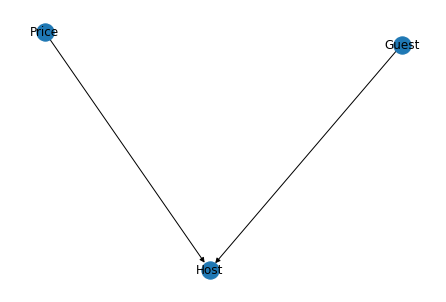

In [47]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import pylab as plt

# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])
 
nx_graph = nx.DiGraph(model.edges())
nx.draw(nx_graph, with_labels=True)
plt.show()

In [51]:
# Defining the CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
#                             [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
#                             [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                      evidence=['Guest', 'Price'], evidence_card=[3, 3])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

model

{}

VariableElimination utiliza el método de eliminación de variables para calcular la distribución de probabilidad condicional. 

Este método consiste en eliminar progresivamente las variables no consultadas de la red bayesiana, lo que reduce la complejidad computacional de la inferencia

In [3]:
# Infering the posterior probability
infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


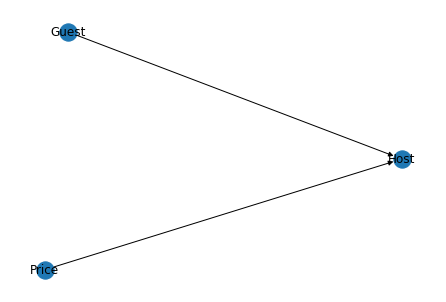

In [4]:
# nx.draw(model, with_labels=True)
nx_graph = nx.DiGraph(model.edges())
nx.draw(nx_graph, with_labels=True)
plt.show()

## Ejemplo 2.

Analicemos el ejemplo de http://anmolkapoor.in/2019/05/05/Inference-Bayesian-Networks-Using-Pgmpy-With-Social-Moderator-Example/.

Un sitio web de redes sociales desea moderar el contenido del sitio y suspender cuentas de usuarios con mal comportamiento. Para ello, quieren crear un moderador estadístico que pueda tomar medidas preventivas basándose en la información facilitada. Supongamos que disponemos de la siguiente información:

    - M : Una predicción de un modelo ML que puede leer el contenido y dar una puntuación (probabilidad) de que este contenido deba ser marcado como malo.
    - U : Otro usuario marca el contenido como malo.
    - B : La cuenta ya había sido suspendida anteriormente por contenido inapropiado.
    - R : Puntuación (Probabilidad) de que el contenido deba ser eliminado de la plataforma.
    - S : Puntuación (Probabilidad) de que se suspenda la cuenta,


![](https://raw.githubusercontent.com/anmolkapoor/inference-bayesian-networks-using-pgmpy-example-social-media-moderator/master/images/bayes_net_final.jpg)


![](https://raw.githubusercontent.com/anmolkapoor/inference-bayesian-networks-using-pgmpy-example-social-media-moderator/master/images/probs.png)

In [5]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import numpy as np

bayesNet = BayesianModel()
bayesNet.add_node("M")
bayesNet.add_node("U")
bayesNet.add_node("R")
bayesNet.add_node("B")
bayesNet.add_node("S")

bayesNet.add_edge("M", "R")
bayesNet.add_edge("U", "R")
bayesNet.add_edge("B", "R")
bayesNet.add_edge("B", "S")
bayesNet.add_edge("R", "S")


In [6]:
cpd_A = TabularCPD('M', 2, values=[[.95], [.05]])
cpd_U = TabularCPD('U', 2, values=[[.85], [.15]])
cpd_H = TabularCPD('B', 2, values=[[.90], [.10]])

cpd_S = TabularCPD('S', 2, values=[[0.98, .88, .95, .6], [.02, .12, .05, .40]],
                   evidence=['R', 'B'], evidence_card=[2, 2])

cpd_R = TabularCPD('R', 2,
                   values=[[0.96, .86, .94, .82, .24, .15, .10, .05], [.04, .14, .06, .18, .76, .85, .90, .95]],
                   evidence=['M', 'B', 'U'], evidence_card=[2, 2,2])

bayesNet.add_cpds(cpd_A, cpd_U, cpd_H, cpd_S, cpd_R)

In [7]:
bayesNet.check_model()
print("Model is correct.")

Model is correct.


In [8]:
solver = VariableElimination(bayesNet)

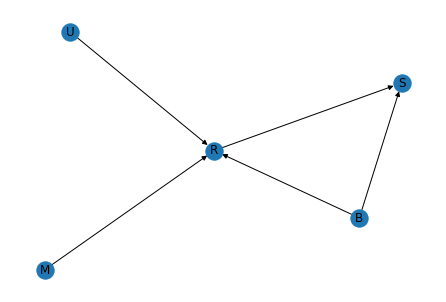

In [9]:
nx_graph = nx.DiGraph(bayesNet.edges())
nx.draw(nx_graph, with_labels=True)
plt.show()

In [10]:
bayesNet.nodes

NodeView(('M', 'U', 'R', 'B', 'S'))

In [11]:
bayesNet.edges

OutEdgeView([('M', 'R'), ('U', 'R'), ('R', 'S'), ('B', 'R'), ('B', 'S')])

#### Probabilidad de que un contenido deba ser eliminado de la plataforma:

P(R) 

=P(R|MBU)*P(M)*P(B)*P(U)+P(R|MBU)*P(M)*P(B)*P(!U)+P(R|MBU)*P(M)*P(!B)*P(U)

+P(R|MBU)*P(M)*P(!B)*P(!U)+P(R|MBU)*P(!M)*P(B)*P(U)+P(R|MBU)*P(!M)*P(B)*P(!U)

+P(R|MBU)*P(!M)*P(!B)*P(U)+P(R|MBU)*P(!M)*P(!B)*P(!U) 

=0.95*0.05*0.1*0.15+0.9*0.05*0.1*0.85+0.85*0.05*0.9*0.15

+0.76*0.05*0.9*0.85+0.18*0.95*0.1*0.15+0.06*0.95*0.1*0.85

+0.14*0.95*0.9*0.15+0.04*0.95*0.9*0.85

=0.09378

In [12]:
result = solver.query(variables=['R'])
print("P(R)", result.values[1])

P(R) 0.09378000000000002


#### Probabilidad de que el contenido sea eliminado de la plataforma dado que un algoritmo de ML lo ha señalado como inadecuado.

In [13]:
result = solver.query(variables=['R'], evidence={'M': 1})
print("P(R|M)", result.values[1])

P(R|M) 0.7869


#### Probabilidad de que una cuenta deba ser suspendida si ya fue suspendida previamente.

In [14]:
result = solver.query(variables=['S'], evidence={'B': 1})
print("P(S | B)", result.values[1])

P(S | B) 0.15345299999999998


#### Probabilidad de que una cuenta deba ser suspendida si ya fue suspendida previamente.

In [15]:
result = solver.query(variables=['S'], evidence={'R': 1})
print("P(S|R)", result.values[1])

P(S|R) 0.0945897312859885


#### Probabilidad de que una cuenta deba ser suspendida si ya fue suspendida previamente y si el contenido debe ser eliminado.

In [16]:
result = solver.query(variables=['S'], evidence={'R': 1, 'B': 1})
print("P(S | R, B)", result.values[1])

P(S | R, B) 0.39999999999999997


## Ejemplo 3. 

Ahora usemos bnlearn.

Pasto húmedo.

Dados los datos, aprender la mejor estructura.

In [28]:
df = bn.import_example('sprinkler')
df.head()

[bnlearn] >Import dataset..


,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1
4,1,1,1,1


[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


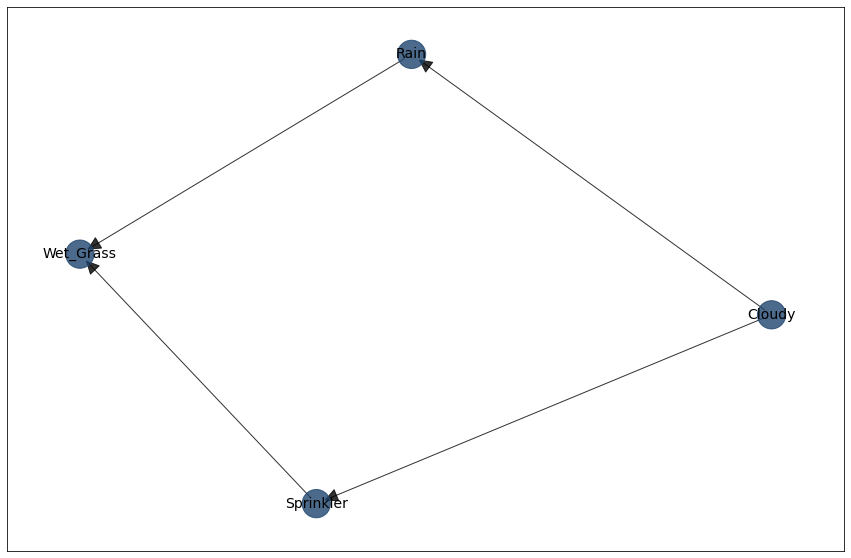

In [18]:
# Structure learning---------
# 'hc' or 'hillclimbsearch' (default)
#     'ex' or 'exhaustivesearch'
#     'cs' or 'constraintsearch'
#     'cl' or 'chow-liu' (requires setting root_node parameter)
#     'nb' or 'naivebayes' (requires <root_node>)
#     'tan' (requires <root_node> and <class_node> parameter)
model = bn.structure_learning.fit(df, methodtype="ex")
# model = bn.structure_learning.fit(df, methodtype="hc")
# Plot
G = bn.plot(model)

### Otra base de datos asia. https://www.bnlearn.com/documentation/man/asia.html 

In [26]:
df_asia = bn.import_example('asia')
df_asia.head()

[bnlearn] >Extracting files..


,asia,tub,smoke,lung,bronc,either,xray,dysp
0,1,1,0,1,1,1,1,1
1,1,1,1,1,0,1,1,0
2,1,1,1,1,0,1,1,0
3,1,1,0,1,0,1,1,0
4,1,1,0,1,0,1,1,0


[bnlearn] >Import <asia>
[bnlearn] >Loading bif file </home/isidro/.local/lib/python3.10/site-packages/bnlearn/data/asia.bif>
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


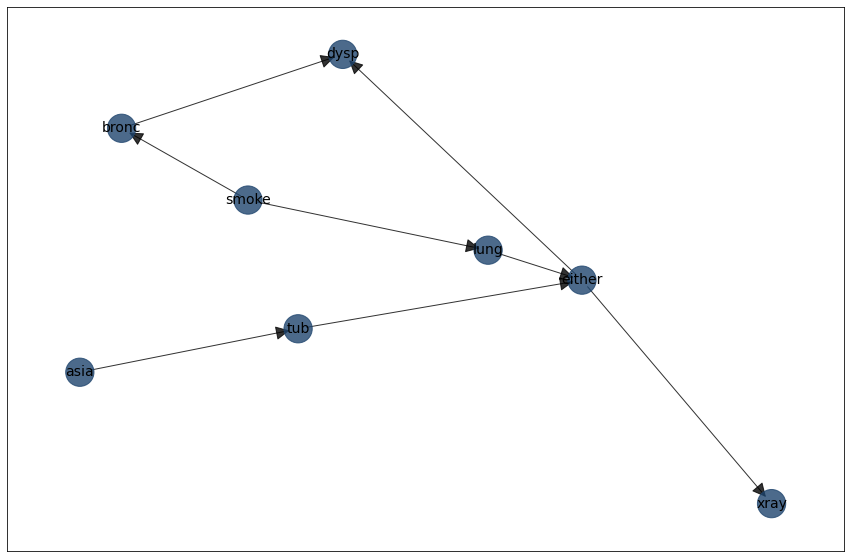

In [24]:
# Load asia DAG
model_true = bn.import_DAG('asia')
# plot ground truth
G = bn.plot(model_true)

[bnlearn] >Computing best DAG using [cs]


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.



[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


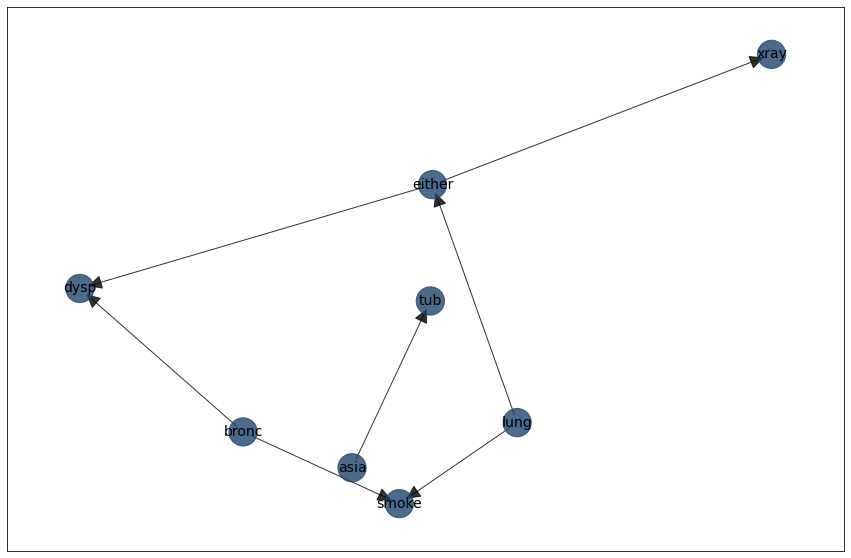

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'asia': array([-0.13899746, -0.31460538]),
  'tub': array([0.07360315, 0.07134214]),
  'smoke': array([-0.01069143, -0.39770853]),
  'lung': array([ 0.30930641, -0.2101961 ]),
  'bronc': array([-0.43474629, -0.23175271]),
  'either': array([0.07949628, 0.34057677]),
  'xray': array([1.        , 0.64209625]),
  'dysp': array([-0.87797065,  0.10024756])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f1f8183f3d0>,
 'node_properties': {'asia': {'node_color': '#1f456e', 'node_size': 800},
  'tub': {'node_color': '#1f456e', 'node_size': 800},
  'lung': {'node_color': '#1f456e', 'node_size': 800},
  'either': {'node_color': '#1f456e', 'node_size': 800},
  'bronc': {'node_color': '#1f456e', 'node_size': 800},
  'dysp': {'node_color': '#1f456e', 'node_size': 800},
  'smoke': {'node_color': '#1f456e', 'node_size': 800},
  'xray': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('as

In [20]:
# Sampling
df = bn.sampling(model_true, n=10000)
# Structure learning of sampled dataset
model_learned = bn.structure_learning.fit(df, methodtype="cs", scoretype='bic')
# Plot based on structure learning of sampled data
bn.plot(model_learned, pos=G['pos'])

[bnlearn] >Existing coordinates from <pos> are used.


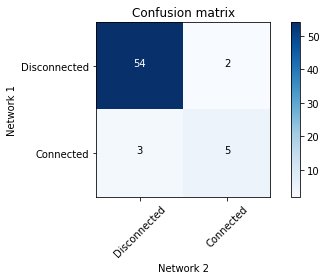

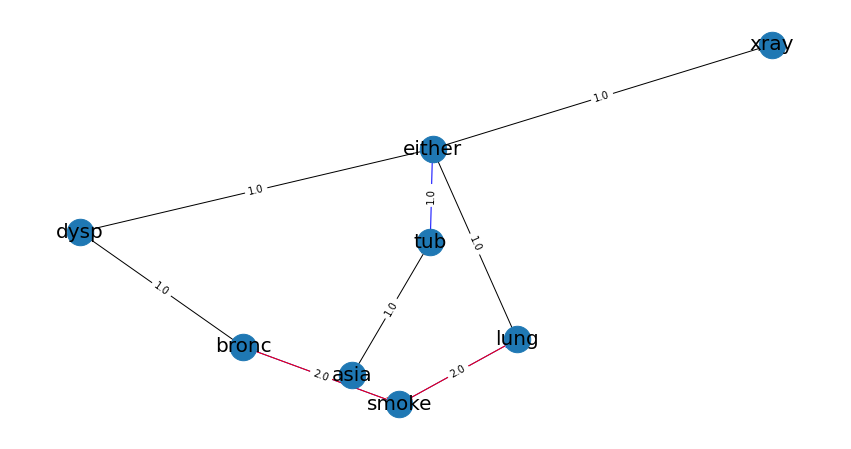

(array([[54,  2],
        [ 3,  5]]),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0    1      0     0      0       0     0     0
 tub        0    0      0     0      0      -1     0     0
 smoke      0    0      0    -1     -1       0     0     0
 lung       0    0      2     0      0       1     0     0
 bronc      0    0      2     0      0       0     0     1
 either     0    0      0     0      0       0     1     1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [21]:
bn.compare_networks(model_true, model_learned, pos=G['pos'])

### Aprender los paramétros dada la estructura

[bnlearn] >Import dataset..
[bnlearn] >Import <sprinkler>
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


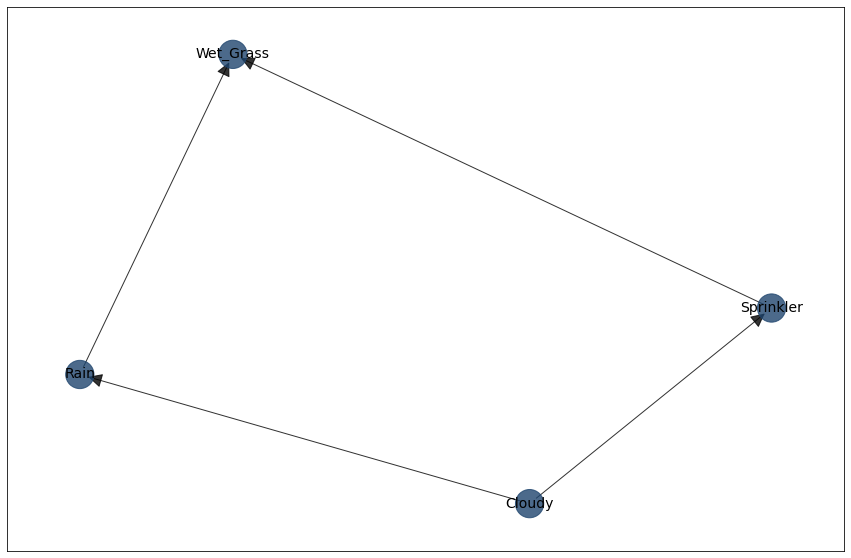

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'Cloudy': array([ 0.19346932, -0.75658572]),
  'Sprinkler': array([0.56470839, 0.00820707]),
  'Rain': array([-0.49652373, -0.25162135]),
  'Wet_Grass': array([-0.26165399,  1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f1f40787550>,
 'node_properties': {'Cloudy': {'node_color': '#1f456e', 'node_size': 800},
  'Sprinkler': {'node_color': '#1f456e', 'node_size': 800},
  'Rain': {'node_color': '#1f456e', 'node_size': 800},
  'Wet_Grass': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Cloudy', 'Sprinkler'): {'color': '#000000',
   'weight': 1},
  ('Cloudy', 'Rain'): {'color': '#000000', 'weight': 1},
  ('Sprinkler', 'Wet_Grass'): {'color': '#000000', 'weight': 1},
  ('Rain', 'Wet_Grass'): {'color': '#000000', 'weight': 1}}}

In [38]:
## considerar datos como evidencia
df = bn.import_example()
## considerar una estructura dada
model = bn.import_DAG('sprinkler', CPD=False)

bn.plot(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.494 |
+-----------+-------+
| Cloudy(1) | 0.506 |
+-----------+-------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+--------------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)          |
+--------------+--------------------+--------------------+
| Sprinkler(0) | 0.4807692307692308 | 0.7075098814229249 |
+--------------+--------------------+--------------------+
| Sprinkler(1) | 0.5192307692307693 | 0.2924901185770751 |
+--------------+--------------------+--------------------+
[bnlearn] >CPD of Rain:
+---------+--------------------+---------------------+
| Cloudy  | Cloudy(0)          | Cloudy(1)           |
+---------+--------------------+---------------------+
| Rain(0) | 0.6518218623481782 | 0.33695652173913043 |
+---------+--------------------+---------------------+
| Rain(1) | 0.3481781376518219 | 0.6630434782608695  |
+-

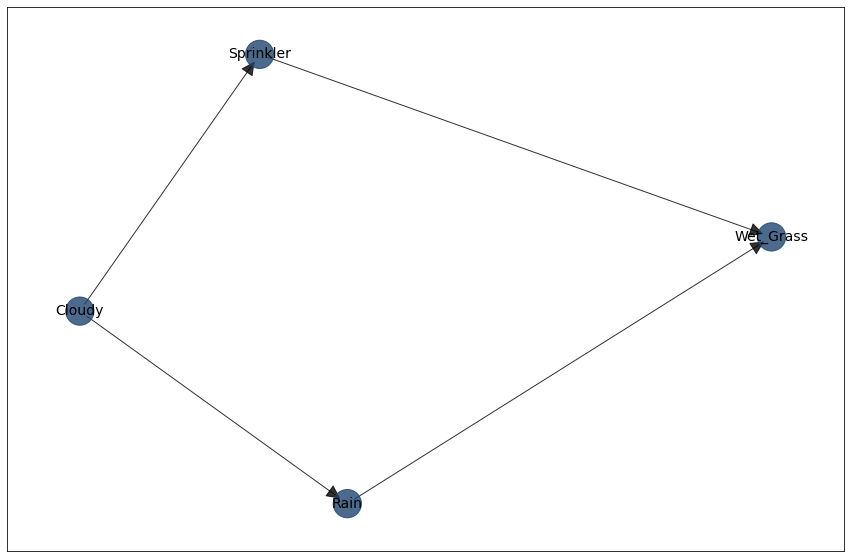

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'Cloudy': array([-0.69968891, -0.09551906]),
  'Sprinkler': array([-0.25784904,  0.61302513]),
  'Rain': array([-0.04246205, -0.62678271]),
  'Wet_Grass': array([1.        , 0.10927665])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f1f407b5cc0>,
 'node_properties': {'Cloudy': {'node_color': '#1f456e', 'node_size': 800},
  'Sprinkler': {'node_color': '#1f456e', 'node_size': 800},
  'Rain': {'node_color': '#1f456e', 'node_size': 800},
  'Wet_Grass': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Cloudy', 'Sprinkler'): {'color': '#000000',
   'weight': 1},
  ('Cloudy', 'Rain'): {'color': '#000000', 'weight': 1},
  ('Sprinkler', 'Wet_Grass'): {'color': '#000000', 'weight': 1},
  ('Rain', 'Wet_Grass'): {'color': '#000000', 'weight': 1}}}

In [39]:
# Parameter learning
model_update = bn.parameter_learning.fit(model, df)
bn.plot(model_update)

In [40]:
print(model_update['adjmat'])

target     Cloudy  Sprinkler   Rain  Wet_Grass
source                                        
Cloudy      False       True   True      False
Sprinkler   False      False  False       True
Rain        False      False  False       True
Wet_Grass   False      False  False      False


## Práctica

Utilizar una base de datos diferente a las empleadas previamente en esta notebook (puede ser hecha a mano), graficar su representación en un grafo. Mostrar alguna tabla de , y calcular con pgmpy o bnlearn alguna probabilidad condicional. 

### Referencias:

- https://analyticsindiamag.com/a-guide-to-inferencing-with-bayesian-network-in-python/
- https://pgmpy.org/
- https://erdogant.github.io/bnlearn/pages/html/Examples.html#parameter-learning
